## Pre-process


In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import plotly.express as px
import seaborn as sns

In [3]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from collections import Counter
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, accuracy_score

In [25]:
data = pd.read_csv('creditcard.csv')

In [26]:
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [5]:
labels=["Non-Fraud","Fraud"]

fraud_or_not = data["Class"].value_counts().tolist()
values = [fraud_or_not[0], fraud_or_not[1]]

fig = px.pie(values=data['Class'].value_counts(), names=labels , width=700, height=400, color_discrete_sequence=["skyblue","black"]
             ,title="Fraud vs Non-Fraud transactions")
fig.show()

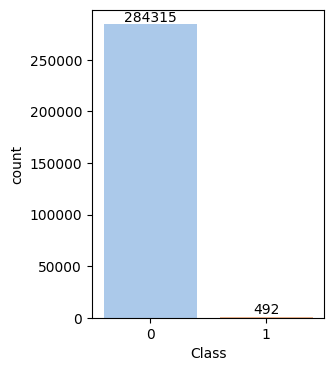

In [6]:
plt.figure(figsize=(3,4))
ax = sns.countplot(x='Class',data=data,palette="pastel")
for i in ax.containers:
    ax.bar_label(i,)

In [7]:
print('Non-fraud:', round(data['Class'].value_counts()[0]/len(data) * 100,2), '% of the dataset')
print('Fraud:', round(data['Class'].value_counts()[1]/len(data) * 100,2), '% of the dataset')

Non-fraud: 99.83 % of the dataset
Fraud: 0.17 % of the dataset


TRAIN TEST

In [27]:
X = data.drop('Class', axis=1)
y = data['Class']

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size = 0.3, random_state = 42)

Normalisation

In [30]:
from sklearn.preprocessing import StandardScaler

In [31]:
#Scaling
def Standard_Scaler (data, col_names):
    features = data[col_names]
    scaler = StandardScaler().fit(features.values)
    features = scaler.transform(features.values)
    data[col_names] = features
    
    return data

In [32]:
col_names = ['Amount']
X_train = Standard_Scaler (X_train, col_names)
X_test = Standard_Scaler (X_test, col_names)

# Baseline

Cross-val

In [33]:
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier


kf = StratifiedKFold(n_splits=5, shuffle=False)

In [34]:
#rf = RandomForestClassifier(n_estimators=100, random_state=13)

In [35]:
from imblearn.pipeline import Pipeline, make_pipeline

# SMOTE

In [14]:
from sklearn.model_selection import GridSearchCV

#params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [4, 6, 10, 12],
    'random_state': [13]
#}

# Random forest

Train

In [61]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline


params_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}


smote_pipeline_rf = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('randomforestclassifier', RandomForestClassifier())
])


new_params_rf = {'randomforestclassifier__' + key: params_rf[key] for key in params_rf}


smote_rf = GridSearchCV(smote_pipeline_rf, param_grid=new_params_rf, cv=kf, scoring='recall',
                        return_train_score=True)
smote_rf.fit(X_train, y_train)


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('smote', SMOTE(random_state=42)),
                                       ('randomforestclassifier',
                                        RandomForestClassifier())]),
             param_grid={'randomforestclassifier__max_depth': [None, 10, 20],
                         'randomforestclassifier__min_samples_split': [2, 5,
                                                                       10],
                         'randomforestclassifier__n_estimators': [100, 200,
                                                                  300]},
             return_train_score=True, scoring='recall')

In [62]:
print('Best parameters:', smote_rf.best_params_)
print('Best score:', smote_rf.best_score_)

Best parameters: {'randomforestclassifier__max_depth': 10, 'randomforestclassifier__min_samples_split': 5, 'randomforestclassifier__n_estimators': 100}
Best score: 0.857459505541347


Test

In [63]:
y_pred = smote_rf.best_estimator_.named_steps['randomforestclassifier'].predict(X_test)

In [64]:
cm = confusion_matrix(y_test, y_pred)

smote_rf_Recall = recall_score(y_test, y_pred)
smote_rf_Precision = precision_score(y_test, y_pred)
smote_rf_f1 = f1_score(y_test, y_pred)
smote_rf_accuracy = accuracy_score(y_test, y_pred)

print(cm)

[[85206    89]
 [   25   123]]


In [65]:
ndf = [(smote_rf_Recall, smote_rf_Precision, smote_rf_f1, smote_rf_accuracy)]

rf_score = pd.DataFrame(data = ndf, columns=['Recall','Precision','F1 Score', 'Accuracy'])
rf_score.insert(0, 'Random Forest with', 'No Under/Oversampling')
rf_score

,Random Forest with,Recall,Precision,F1 Score,Accuracy
0,No Under/Oversampling,0.831081,0.580189,0.683333,0.998666


In [66]:
from sklearn.metrics import roc_auc_score
ROCAUCscore = roc_auc_score(y_test, y_pred)
print(f"AUC-ROC Curve for Random Forest with Class weights: {ROCAUCscore:.4f}")

AUC-ROC Curve for Random Forest with Class weights: 0.9150


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


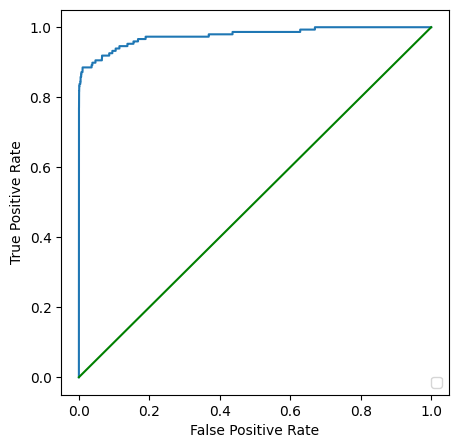

In [67]:
y_proba = smote_rf.predict_proba(X_test)

from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
def plot_auc_roc_curve(y_test, y_pred):
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
    roc_display.figure_.set_size_inches(5,5)
    plt.plot([0, 1], [0, 1], color = 'g')

plot_auc_roc_curve(y_test, y_proba[:, 1])


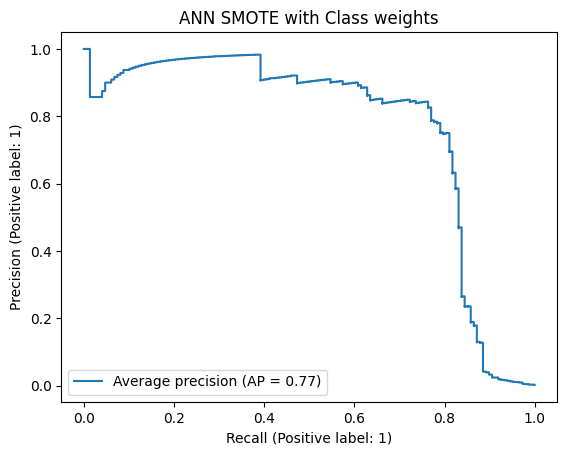

In [68]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay

display = PrecisionRecallDisplay.from_estimator(
    smote_rf, X_test, y_test, name="Average precision")
_ = display.ax_.set_title("ANN SMOTE with Class weights")

# ANN

Train

In [36]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline


params_ann = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
    'max_iter': [100, 200, 500]
}


smote_pipeline_ann = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('mlpclassifier', MLPClassifier())
])


new_params_ann = {'mlpclassifier__' + key: params_ann[key] for key in params_ann}


smote_ann = GridSearchCV(smote_pipeline_ann, param_grid=new_params_ann, cv=kf, scoring='recall',
                         return_train_score=True)
smote_ann.fit(X_train, y_train)


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('smote', SMOTE(random_state=42)),
                                       ('mlpclassifier', MLPClassifier())]),
             param_grid={'mlpclassifier__hidden_layer_sizes': [(50,), (100,),
                                                               (50, 50),
                                                               (100, 50)],
                         'mlpclassifier__max_iter': [100, 200, 500]},
             return_train_score=True, scoring='recall')

In [44]:
print('Best parameters:', smote_ann.best_params_)
print('Best score:', smote_ann.best_score_)

Best parameters: {'mlpclassifier__hidden_layer_sizes': (50,), 'mlpclassifier__max_iter': 500}
Best score: 0.9475703324808185


Test

In [45]:
y_pred = smote_ann.best_estimator_.named_steps['mlpclassifier'].predict(X_test)

In [46]:
cm = confusion_matrix(y_test, y_pred)

smote_ann_Recall = recall_score(y_test, y_pred)
smote_ann_Precision = precision_score(y_test, y_pred)
smote_ann_f1 = f1_score(y_test, y_pred)
smote_ann_accuracy = accuracy_score(y_test, y_pred)

print(cm)

[[64064 21231]
 [    4   144]]


In [47]:
ndf = [(smote_ann_Recall, smote_ann_Precision, smote_ann_f1, smote_ann_accuracy)]

smote_ann_score = pd.DataFrame(data = ndf, columns=['Recall','Precision','F1 Score', 'Accuracy'])
smote_ann_score.insert(0, 'mlpclassifier SMOTE with', 'No Under/Oversampling')
smote_ann_score

,mlpclassifier SMOTE with,Recall,Precision,F1 Score,Accuracy
0,No Under/Oversampling,0.972973,0.006737,0.013381,0.751472


In [48]:
from sklearn.metrics import roc_auc_score
ROCAUCscore = roc_auc_score(y_test, y_pred)
print(f"AUC-ROC Curve for Random Forest with Class weights: {ROCAUCscore:.4f}")

AUC-ROC Curve for Random Forest with Class weights: 0.8620


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


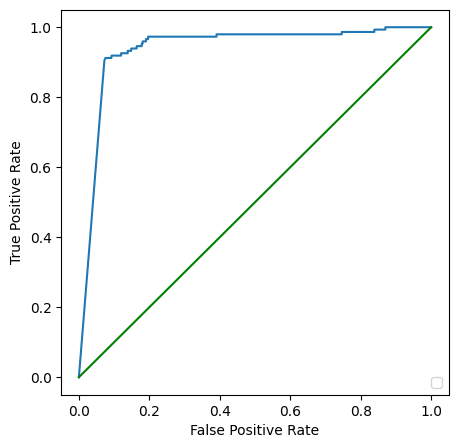

In [49]:
y_proba = smote_ann.predict_proba(X_test)

from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
def plot_auc_roc_curve(y_test, y_pred):
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
    roc_display.figure_.set_size_inches(5,5)
    plt.plot([0, 1], [0, 1], color = 'g')

plot_auc_roc_curve(y_test, y_proba[:, 1])


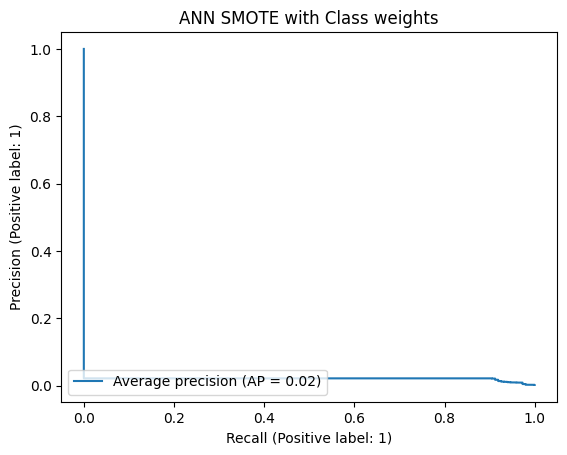

In [50]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay

display = PrecisionRecallDisplay.from_estimator(
    smote_ann, X_test, y_test, name="Average precision")
_ = display.ax_.set_title("ANN SMOTE with Class weights")

# XGBoost

Train

In [18]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from imblearn.pipeline import Pipeline


params_xgb = {
    'learning_rate': [0.1, 0.01],
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3]
}


smote_pipeline_xgb = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('xgbclassifier', XGBClassifier())
])


new_params_xgb = {'xgbclassifier__' + key: params_xgb[key] for key in params_xgb}


smote_xgb = GridSearchCV(smote_pipeline_xgb, param_grid=new_params_xgb, cv=kf, scoring='recall',
                         return_train_score=True)
smote_xgb.fit(X_train, y_train)


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('smote', SMOTE(random_state=42)),
                                       ('xgbclassifier',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      early_stopping_rounds=None,
                                                      enable_categorical=False,
                                                      eval_metric=None,
                                                      feat...
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      n_estimators=100,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      predictor=None,
                                                      random_state=None, ...))]),
             param_grid={'xgbclassifier__learning_rate': [0.1, 0.01],
                         'xgbclassifier__max_depth': [3, 5, 7],
                         'xgbclassifier__min_child_weight': [1, 3],
                         'xgbclassifier__n_estimators': [100, 200]},
             return_train_score=True, scoring='recall')

In [19]:
print('Best parameters:', smote_xgb.best_params_)
print('Best score:', smote_xgb.best_score_)

Best parameters: {'xgbclassifier__learning_rate': 0.01, 'xgbclassifier__max_depth': 5, 'xgbclassifier__min_child_weight': 1, 'xgbclassifier__n_estimators': 200}
Best score: 0.8922847399829497


Test

In [21]:
y_pred = smote_xgb.best_estimator_.named_steps['xgbclassifier'].predict(X_test)

In [26]:
cm = confusion_matrix(y_test, y_pred)

smote_xgb_Recall = recall_score(y_test, y_pred)
smote_xgb_Precision = precision_score(y_test, y_pred)
smote_xgb_f1 = f1_score(y_test, y_pred)
smote_xgb_accuracy = accuracy_score(y_test, y_pred)

print(cm)

[[84618   677]
 [   20   128]]


In [27]:
ndf = [(smote_xgb_Recall, smote_xgb_Precision, smote_xgb_f1, smote_xgb_accuracy)]

xgb_score = pd.DataFrame(data = ndf, columns=['Recall','Precision','F1 Score', 'Accuracy'])
xgb_score.insert(0, 'xgbclassifier with', 'No Under/Oversampling')
xgb_score

,xgbclassifier with,Recall,Precision,F1 Score,Accuracy
0,No Under/Oversampling,0.864865,0.159006,0.268625,0.991843


In [32]:
from sklearn.metrics import roc_auc_score
ROCAUCscore = roc_auc_score(y_test, y_pred)
print(f"AUC-ROC Curve for Random Forest with Class weights: {ROCAUCscore:.4f}")

AUC-ROC Curve for Random Forest with Class weights: 0.9285


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


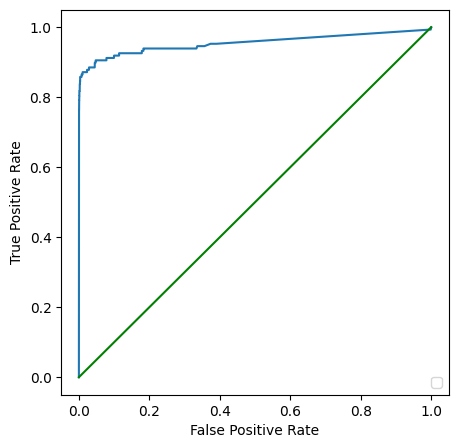

In [33]:
y_proba = smote_xgb.predict_proba(X_test)

from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
def plot_auc_roc_curve(y_test, y_pred):
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
    roc_display.figure_.set_size_inches(5,5)
    plt.plot([0, 1], [0, 1], color = 'g')

plot_auc_roc_curve(y_test, y_proba[:, 1])


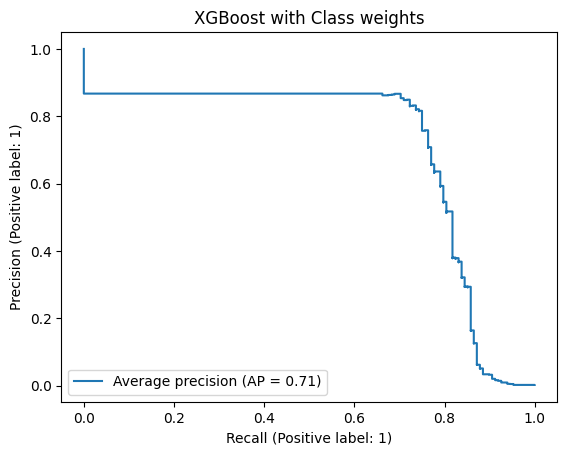

In [34]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay

display = PrecisionRecallDisplay.from_estimator(
    smote_xgb, X_test, y_test, name="Average precision")
_ = display.ax_.set_title("XGBoost with Class weights")

# AdaBoost

In [51]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from imblearn.pipeline import Pipeline


params_adaboost = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.5]
}


smote_pipeline_adaboost = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('adaboostclassifier', AdaBoostClassifier())
])


new_params_adaboost = {'adaboostclassifier__' + key: params_adaboost[key] for key in params_adaboost}


smote_adaboost = GridSearchCV(smote_pipeline_adaboost, param_grid=new_params_adaboost, cv=kf, scoring='recall',
                              return_train_score=True)
smote_adaboost.fit(X_train, y_train)



GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('smote', SMOTE(random_state=42)),
                                       ('adaboostclassifier',
                                        AdaBoostClassifier())]),
             param_grid={'adaboostclassifier__learning_rate': [0.01, 0.1, 0.5],
                         'adaboostclassifier__n_estimators': [50, 100, 200]},
             return_train_score=True, scoring='recall')

In [60]:
print('Best parameters:', smote_adaboost.best_params_)
print('Best score:', smote_adaboost.best_score_)

Best parameters: {'adaboostclassifier__learning_rate': 0.1, 'adaboostclassifier__n_estimators': 100}
Best score: 0.9010230179028133


In [52]:
y_pred = smote_adaboost.best_estimator_.named_steps['adaboostclassifier'].predict(X_test)

In [53]:
cm = confusion_matrix(y_test, y_pred)

smote_adaboost_Recall = recall_score(y_test, y_pred)
smote_adaboost_Precision = precision_score(y_test, y_pred)
smote_adaboost_f1 = f1_score(y_test, y_pred)
smote_adaboost_accuracy = accuracy_score(y_test, y_pred)

print(cm)

[[84198  1097]
 [   21   127]]


In [55]:
ndf = [(smote_adaboost_Recall, smote_adaboost_Precision, smote_adaboost_f1, smote_adaboost_accuracy)]

adaboost_score = pd.DataFrame(data = ndf, columns=['Recall','Precision','F1 Score', 'Accuracy'])
adaboost_score.insert(0, 'adaboost with', 'No Under/Oversampling')
adaboost_score

,adaboost with,Recall,Precision,F1 Score,Accuracy
0,No Under/Oversampling,0.858108,0.103758,0.185131,0.986915


In [56]:
from sklearn.metrics import roc_auc_score
ROCAUCscore = roc_auc_score(y_test, y_pred)
print(f"AUC-ROC Curve for ADABoost with Class weights: {ROCAUCscore:.4f}")

AUC-ROC Curve for ADABoost with Class weights: 0.9226


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


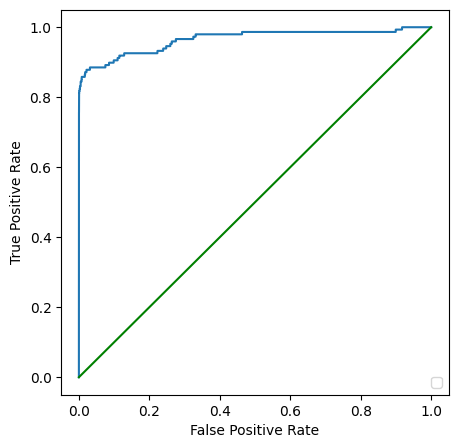

In [57]:
y_proba = smote_adaboost.predict_proba(X_test)

from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
def plot_auc_roc_curve(y_test, y_pred):
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
    roc_display.figure_.set_size_inches(5,5)
    plt.plot([0, 1], [0, 1], color = 'g')

plot_auc_roc_curve(y_test, y_proba[:, 1])


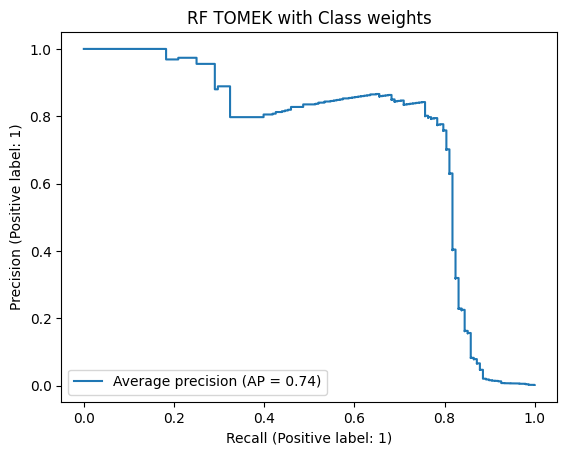

In [59]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay

display = PrecisionRecallDisplay.from_estimator(
    smote_adaboost, X_test, y_test, name="Average precision")
_ = display.ax_.set_title("RF TOMEK with Class weights")

# RF TOMEK

In [18]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from imblearn.under_sampling import TomekLinks
from imblearn.pipeline import Pipeline


params_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}


tomek_pipeline_rf = Pipeline([
    ('tomek', TomekLinks()),
    ('randomforestclassifier', RandomForestClassifier())
])


new_params_rf = {'randomforestclassifier__' + key: params_rf[key] for key in params_rf}


tomek_rf = GridSearchCV(tomek_pipeline_rf, param_grid=new_params_rf, cv=kf, scoring='recall',
                        return_train_score=True)
tomek_rf.fit(X_train, y_train)


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('tomek', TomekLinks()),
                                       ('randomforestclassifier',
                                        RandomForestClassifier())]),
             param_grid={'randomforestclassifier__max_depth': [None, 10, 20],
                         'randomforestclassifier__min_samples_split': [2, 5,
                                                                       10],
                         'randomforestclassifier__n_estimators': [100, 200,
                                                                  300]},
             return_train_score=True, scoring='recall')

In [19]:
print('Best parameters:', tomek_rf.best_params_)
print('Best score:', tomek_rf.best_score_)

Best parameters: {'randomforestclassifier__max_depth': None, 'randomforestclassifier__min_samples_split': 5, 'randomforestclassifier__n_estimators': 300}
Best score: 0.7965046888320545


In [57]:
y_pred = tomek_rf.best_estimator_.named_steps['randomforestclassifier'].predict(X_test)

In [22]:
cm = confusion_matrix(y_test, y_pred)

tomek_rf_Recall = recall_score(y_test, y_pred)
tomek_rf_Precision = precision_score(y_test, y_pred)
tomek_rf_f1 = f1_score(y_test, y_pred)
tomek_rf_accuracy = accuracy_score(y_test, y_pred)

print(cm)

[[85289     6]
 [   35   113]]


In [23]:
ndf = [(tomek_rf_Recall, tomek_rf_Precision, tomek_rf_f1, tomek_rf_accuracy)]

rf_score = pd.DataFrame(data = ndf, columns=['Recall','Precision','F1 Score', 'Accuracy'])
rf_score.insert(0, 'Random Forest with', 'No Under/Oversampling')
rf_score

,Random Forest with,Recall,Precision,F1 Score,Accuracy
0,No Under/Oversampling,0.763514,0.94958,0.846442,0.99952


In [58]:
from sklearn.metrics import roc_auc_score
ROCAUCscore = roc_auc_score(y_test, y_pred)
print(f"AUC-ROC Curve for Random Forest TOMEK with Class weights: {ROCAUCscore:.4f}")

AUC-ROC Curve for Random Forest TOMEK with Class weights: 0.8817


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


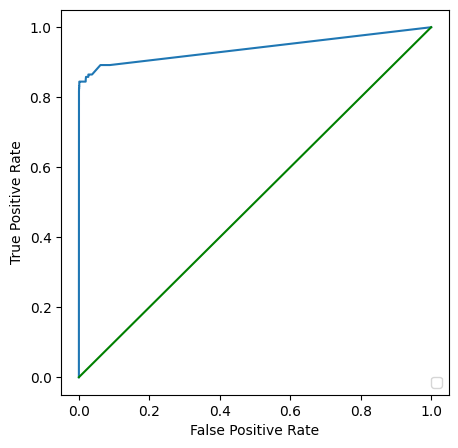

In [59]:
y_proba = tomek_rf.predict_proba(X_test)

from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
def plot_auc_roc_curve(y_test, y_pred):
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
    roc_display.figure_.set_size_inches(5,5)
    plt.plot([0, 1], [0, 1], color = 'g')
# Plots the ROC curve using the sklearn methods - Good plot
plot_auc_roc_curve(y_test, y_proba[:, 1])
# Plots the ROC curve using the sklearn methods - Bad plot
#plot_sklearn_roc_curve(y_test, y_pred)

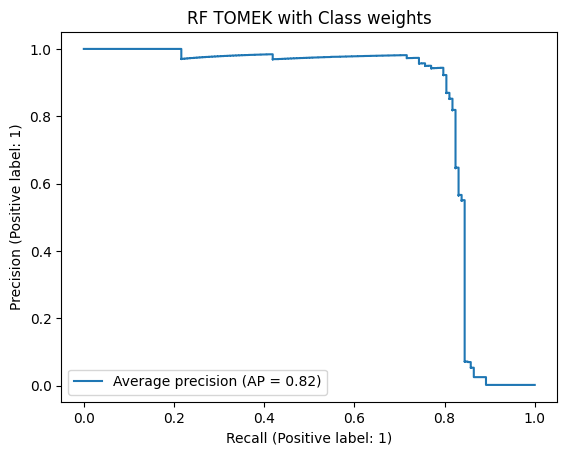

In [61]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay

display = PrecisionRecallDisplay.from_estimator(
    tomek_rf, X_test, y_test, name="Average precision")
_ = display.ax_.set_title("RF TOMEK with Class weights")

# ANN TOMEK

In [34]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from imblearn.under_sampling import TomekLinks
from imblearn.pipeline import Pipeline


params_ann = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
    'max_iter': [100, 200, 500]
}


tomek_pipeline_ann = Pipeline([
    ('tomek', TomekLinks()),
    ('mlpclassifier', MLPClassifier())
])


new_params_ann = {'mlpclassifier__' + key: params_ann[key] for key in params_ann}


tomek_ann = GridSearchCV(tomek_pipeline_ann, param_grid=new_params_ann, cv=kf, scoring='recall',
                         return_train_score=True)
tomek_ann.fit(X_train, y_train)


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('tomek', TomekLinks()),
                                       ('mlpclassifier', MLPClassifier())]),
             param_grid={'mlpclassifier__hidden_layer_sizes': [(50,), (100,),
                                                               (50, 50),
                                                               (100, 50)],
                         'mlpclassifier__max_iter': [100, 200, 500]},
             return_train_score=True, scoring='recall')

In [36]:
print('Best parameters:', tomek_ann.best_params_)
print('Best score:', tomek_ann.best_score_)

Best parameters: {'mlpclassifier__hidden_layer_sizes': (100,), 'mlpclassifier__max_iter': 500}
Best score: 0.7294117647058823


In [49]:
y_pred = tomek_ann.best_estimator_.named_steps['mlpclassifier'].predict(X_test)

In [50]:
cm = confusion_matrix(y_test, y_pred)

tomek_ann_Recall = recall_score(y_test, y_pred)
tomek_ann_Precision = precision_score(y_test, y_pred)
tomek_ann_f1 = f1_score(y_test, y_pred)
tomek_ann_accuracy = accuracy_score(y_test, y_pred)

print(cm)

[[85294     1]
 [  142     6]]


In [52]:
ndf = [(tomek_ann_Recall, tomek_ann_Precision, tomek_ann_f1, tomek_ann_accuracy)]

ann_score = pd.DataFrame(data = ndf, columns=['Recall','Precision','F1 Score', 'Accuracy'])
ann_score.insert(0, 'Random Forest with', 'No Under/Oversampling')
ann_score

,Random Forest with,Recall,Precision,F1 Score,Accuracy
0,No Under/Oversampling,0.040541,0.857143,0.077419,0.998326


In [53]:
from sklearn.metrics import roc_auc_score
ROCAUCscore = roc_auc_score(y_test, y_pred)
print(f"AUC-ROC Curve for Random Forest with Class weights: {ROCAUCscore:.4f}")

AUC-ROC Curve for Random Forest with Class weights: 0.5203


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


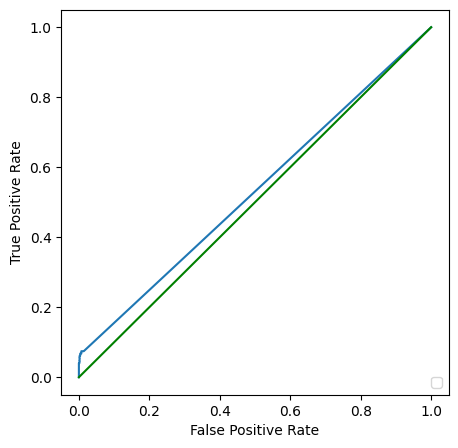

In [54]:
y_proba = tomek_ann.predict_proba(X_test)

from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
def plot_auc_roc_curve(y_test, y_pred):
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
    roc_display.figure_.set_size_inches(5,5)
    plt.plot([0, 1], [0, 1], color = 'g')

plot_auc_roc_curve(y_test, y_proba[:, 1])


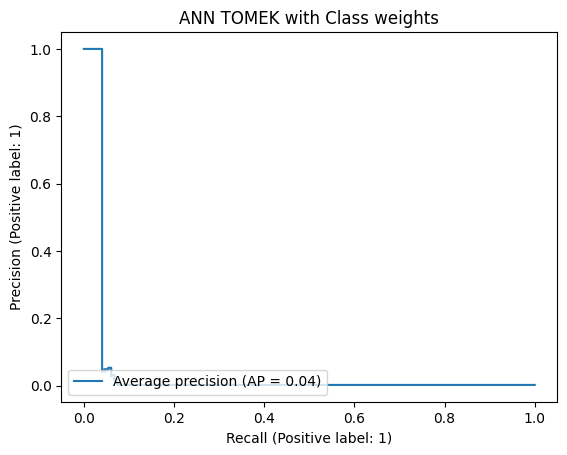

In [56]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay

display = PrecisionRecallDisplay.from_estimator(
    tomek_ann, X_test, y_test, name="Average precision")
_ = display.ax_.set_title("ANN TOMEK with Class weights")

# XGBoost TOMEK

In [40]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from imblearn.under_sampling import TomekLinks
from imblearn.pipeline import Pipeline


params_xgb = {
    'learning_rate': [0.1, 0.01],
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3]
}


tomek_pipeline_xgb = Pipeline([
    ('tomek', TomekLinks()),
    ('xgbclassifier', XGBClassifier())
])


new_params_xgb = {'xgbclassifier__' + key: params_xgb[key] for key in params_xgb}


tomek_xgb = GridSearchCV(tomek_pipeline_xgb, param_grid=new_params_xgb, cv=kf, scoring='recall',
                         return_train_score=True)
tomek_xgb.fit(X_train, y_train)


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('tomek', TomekLinks()),
                                       ('xgbclassifier',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      early_stopping_rounds=None,
                                                      enable_categorical=False,
                                                      eval_metric=None,
                                                      feature_types=...
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      n_estimators=100,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      predictor=None,
                                                      random_state=None, ...))]),
             param_grid={'xgbclassifier__learning_rate': [0.1, 0.01],
                         'xgbclassifier__max_depth': [3, 5, 7],
                         'xgbclassifier__min_child_weight': [1, 3],
                         'xgbclassifier__n_estimators': [100, 200]},
             return_train_score=True, scoring='recall')

In [41]:
print('Best parameters:', tomek_xgb.best_params_)
print('Best score:', tomek_xgb.best_score_)

Best parameters: {'xgbclassifier__learning_rate': 0.1, 'xgbclassifier__max_depth': 3, 'xgbclassifier__min_child_weight': 1, 'xgbclassifier__n_estimators': 100}
Best score: 0.8138533674339301


In [43]:
y_pred = tomek_xgb.best_estimator_.named_steps['xgbclassifier'].predict(X_test)

In [44]:
cm = confusion_matrix(y_test, y_pred)

tomek_xgb_Recall = recall_score(y_test, y_pred)
tomek_xgb_Precision = precision_score(y_test, y_pred)
tomek_xgb_f1 = f1_score(y_test, y_pred)
tomek_xgb_accuracy = accuracy_score(y_test, y_pred)

print(cm)

[[85278    17]
 [   35   113]]


In [45]:
ndf = [(tomek_xgb_Recall, tomek_xgb_Precision, tomek_xgb_f1, tomek_xgb_accuracy)]

ann_score = pd.DataFrame(data = ndf, columns=['Recall','Precision','F1 Score', 'Accuracy'])
ann_score.insert(0, 'Random Forest with', 'No Under/Oversampling')
ann_score

,Random Forest with,Recall,Precision,F1 Score,Accuracy
0,No Under/Oversampling,0.763514,0.869231,0.81295,0.999391


In [46]:
from sklearn.metrics import roc_auc_score
ROCAUCscore = roc_auc_score(y_test, y_pred)
print(f"AUC-ROC Curve for XGBoost TOMEK with Class weights: {ROCAUCscore:.4f}")

AUC-ROC Curve for XGBoost TOMEK with Class weights: 0.8817


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


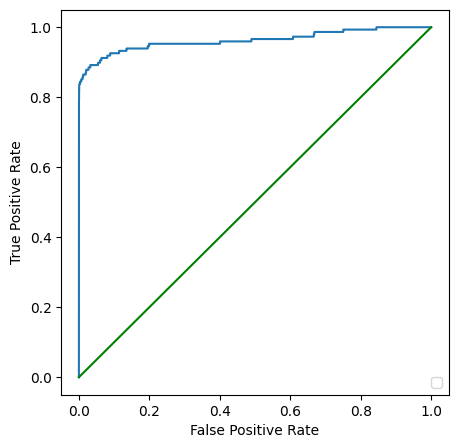

In [47]:
y_proba = tomek_xgb.predict_proba(X_test)

from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
def plot_auc_roc_curve(y_test, y_pred):
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
    roc_display.figure_.set_size_inches(5,5)
    plt.plot([0, 1], [0, 1], color = 'g')

plot_auc_roc_curve(y_test, y_proba[:, 1])


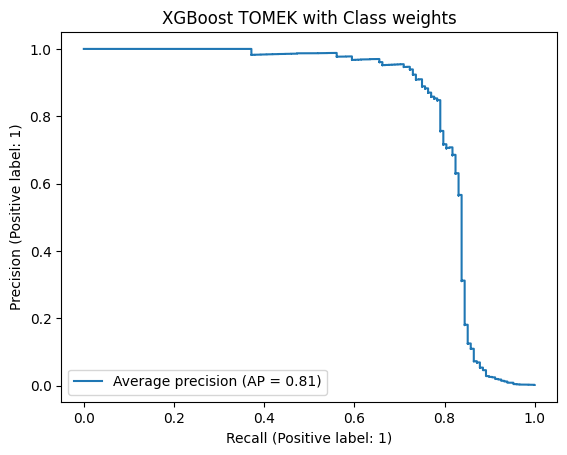

In [48]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay

display = PrecisionRecallDisplay.from_estimator(
    tomek_xgb, X_test, y_test, name="Average precision")
_ = display.ax_.set_title("XGBoost TOMEK with Class weights")

# AdaBoost TOMEK

In [16]:
print('Best parameters:', tomek_adaboost.best_params_)
print('Best score:', tomek_adaboost.best_score_)

Best parameters: {'adaboostclassifier__learning_rate': 0.1, 'adaboostclassifier__n_estimators': 200}
Best score: 0.700383631713555


In [17]:
y_pred = tomek_adaboost.best_estimator_.named_steps['adaboostclassifier'].predict(X_test)

In [20]:
cm = confusion_matrix(y_test, y_pred)

tomek_adaboost_Recall = recall_score(y_test, y_pred)
tomek_adaboost_Precision = precision_score(y_test, y_pred)
tomek_adaboost_f1 = f1_score(y_test, y_pred)
tomek_adaboost_accuracy = accuracy_score(y_test, y_pred)

print(cm)

[[85270    25]
 [   46   102]]


In [21]:
ndf = [(tomek_adaboost_Recall, tomek_adaboost_Precision, tomek_adaboost_f1, tomek_adaboost_accuracy)]

ann_score = pd.DataFrame(data = ndf, columns=['Recall','Precision','F1 Score', 'Accuracy'])
ann_score.insert(0, 'adaBoost with', 'No Under/Oversampling')
ann_score

,adaBoost with,Recall,Precision,F1 Score,Accuracy
0,No Under/Oversampling,0.689189,0.80315,0.741818,0.999169


In [22]:
from sklearn.metrics import roc_auc_score
ROCAUCscore = roc_auc_score(y_test, y_pred)
print(f"AUC-ROC Curve for AdaBoost TOMEK with Class weights: {ROCAUCscore:.4f}")

AUC-ROC Curve for AdaBoost TOMEK with Class weights: 0.8444


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


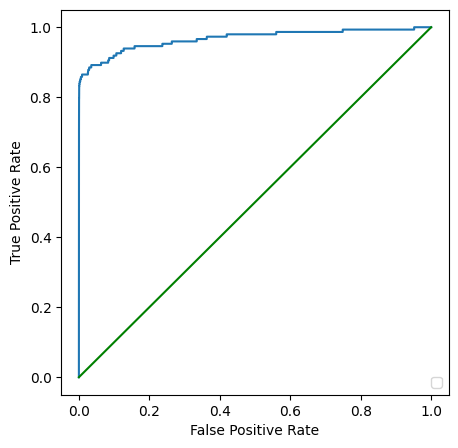

In [23]:
y_proba = tomek_adaboost.predict_proba(X_test)

from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
def plot_auc_roc_curve(y_test, y_pred):
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
    roc_display.figure_.set_size_inches(5,5)
    plt.plot([0, 1], [0, 1], color = 'g')

plot_auc_roc_curve(y_test, y_proba[:, 1])


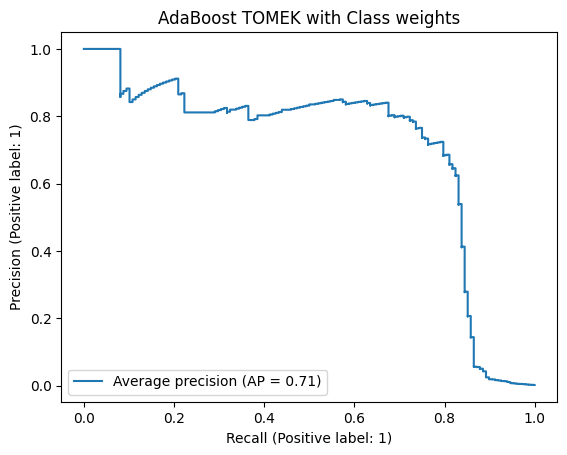

In [24]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay

display = PrecisionRecallDisplay.from_estimator(
    tomek_adaboost, X_test, y_test, name="Average precision")
_ = display.ax_.set_title("AdaBoost TOMEK with Class weights")

In [69]:
import pandas as pd

#Exemple
smote_xgboost_Recall = 0.85
smote_xgboost_Precision = 0.75
smote_xgboost_f1 = 0.80
smote_xgboost_accuracy = 0.82

smote_ann_Recall = 0.78
smote_ann_Precision = 0.82
smote_ann_f1 = 0.80
smote_ann_accuracy = 0.80


smote_scores = [
    ("XGBoost", smote_xgboost_Recall, smote_xgboost_Precision, smote_xgboost_f1, smote_xgboost_accuracy),
    ("ANN", smote_ann_Recall, smote_ann_Precision, smote_ann_f1, smote_ann_accuracy),
    
]


smote_score_df = pd.DataFrame(smote_scores, columns=['Model', 'Recall', 'Precision', 'F1 Score', 'Accuracy'])

smote_score_df['Sampling Method'] = 'SMOTE'

tomek_scores = [
]

tomek_score_df = pd.DataFrame(tomek_scores, columns=['Model', 'Recall', 'Precision', 'F1 Score', 'Accuracy'])

tomek_score_df['Sampling Method'] = 'TOMEK'

final_table = pd.concat([smote_score_df, tomek_score_df], ignore_index=True)

print(final_table)


     Model  Recall  Precision  F1 Score  Accuracy Sampling Method
0  XGBoost    0.85       0.75       0.8      0.82           SMOTE
1      ANN    0.78       0.82       0.8      0.80           SMOTE
